In [5]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(224,224,1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(72, activation='relu'),
    layers.Dense(36, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 72)             │    24,920,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 36)             │         2,628 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,015,436 (95.43 MB)

 Trainable params: 25,015,436 (95.43 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Define a new neural network model
new_model = models.Sequential([
    layers.Input(shape=(224,224,1)),
    layers.Dense(144, activation='relu'),
    layers.Dense(72, activation='relu'),
    layers.Dense(36, activation='softmax') 
])

# Compile the new model
new_model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

# Summary of the new model
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 224, 224, 144)  │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 224, 224, 72)   │        10,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 224, 224, 36)   │         2,628 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,356 (52.17 KB)

 Trainable params: 13,356 (52.17 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,      
    rotation_range=15, 
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data from 'asl_dataset' folder with target size 224x224 and grayscale mode
train_generator = datagen.flow_from_directory(
    'asl_dataset',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    'asl_dataset',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [9]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50, 
    batch_size=64
)

63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6780 - loss: 0.9443 - val_accuracy: 0.6501 - val_loss: 0.9583


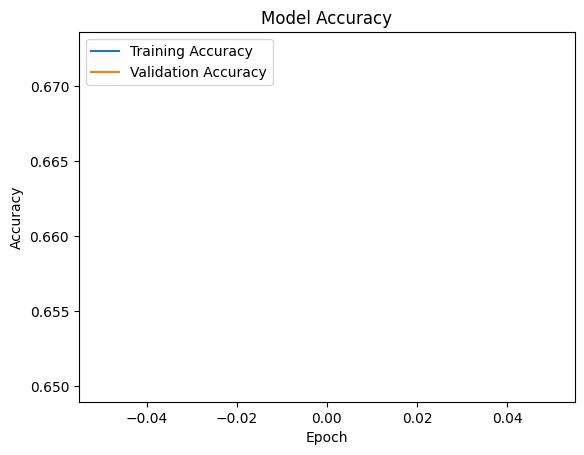

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
